<a href="https://colab.research.google.com/github/Leonardo-Lopes-Borem-Peixoto/Project_ChurnPrediction/blob/main/Project_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Context:
# You were hired as a data scientist by telecommunications operator Alura Voz.
# In the initial meeting with the people responsible for the company's sales area, the importance of reducing the Customer Evasion Rate, known as Churn Rate, was explained.
# Basically, the Churn Rate indicates how much the company lost in revenue or customers over a period of time.
# With your experience, you suggest, as an initial step, identifying customers who are most likely to leave the company.
# To do this, you explain that it is interesting to investigate some characteristics of clients or client plans to try to CLASSIFY these people as potential candidates to leave the company or not.
# So, you request the dataset to start exploring, processing and modeling from now on. Next, the focus will be on optimizing each of the models in order to obtain
# the best result for Alura Voz's decision-making.
# Meaning of the variables in the dataset:
# customerID: unique identification number for each customer
# Churn: whether or not the customer left the company
# gender: gender (male and female)
# SeniorCitizen: information about whether or not a customer is 65 years old or older
# Partner: whether or not the client has a partner
# Dependents: whether or not the client has dependents
# tenure: months of customer contract
# PhoneService: telephone service subscription
# MultipleLines: subscribing to more than one telephone line
# InternetService: subscription to an internet provider
# OnlineSecurity: additional online security subscription
# OnlineBackup: additional online backup subscription
# DeviceProtection: additional on-device protection subscription
# TechSupport: additional technical support subscription, less waiting time
# StreamingTV: cable TV subscription
# StreamingMovies: movie streaming subscription
# Contract: type of contract
# PaperlessBilling: if the customer prefers to receive the invoice online
# PaymentMethod: payment method
# Charges.Monthly: total income from all hired customer services per month
# Charges.Total: total spent by the customer


In [2]:
# Importimg some important libraries
import pandas as pd
import numpy as np

In [3]:
# Loading and visualizing an overview of the data
file = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Seeing how the data looks. A lot of information is clustered together in a single column, so we need separate those into their own columns.
file.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
# Assigning the data to a variable so we can change it without changing the original data.
df = file

In [6]:
# Separating all the clustered data into different columns and setting the index to the customer ID
df2 = pd.concat([df,pd.DataFrame(file['customer'].to_list())],axis=1)
df2 = pd.concat([df2,pd.DataFrame(file['phone'].to_list())],axis=1)
df2 = pd.concat([df2,pd.DataFrame(file['internet'].to_list())],axis=1)
df2 = pd.concat([df2,pd.DataFrame(file['account'].to_list())],axis=1)
df2 = pd.concat([df2,pd.DataFrame(df2['Charges'].to_list())],axis=1)
df2.drop(['customer','phone','internet','account','Charges'],axis=1,inplace=True)
df2.set_index('customerID',inplace=True)
df2

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75


In [7]:
df2['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [8]:
# After checking the unique values in each column of the dataframe, we could see that there were inconsistencies in the data. For 224 of the entries,
# there was no value assigned to the "Churn" column, which I opted for removing from the dataset. The "Total" and "SeniorCitizen" columns had the wrong dtype
# Some entries on the "Total" column were empty as well. Finally, it`s important to check inconsistencies in the additional services.

print('number of blank Total entries is '+ str(df2.query('Total==" "').shape[0]))
print('number of empty Churn entries is ' + str(df2.query('Churn==""').shape[0]))
print('number of inconsistent OnlineSecurity entries is ' + str(df2.query('InternetService=="No" and OnlineSecurity=="Yes"').shape[0]))
print('number of inconsistent OnlineBackup entries is ' + str(df2.query('InternetService=="No" and OnlineBackup=="Yes"').shape[0]))
print('number of inconsistent DeviceProtection entries is ' + str(df2.query('InternetService=="No" and DeviceProtection=="Yes"').shape[0]))
print('number of inconsistent TechSupport entries is ' + str(df2.query('InternetService=="No" and TechSupport=="Yes"').shape[0]))
print('number of inconsistent StreamingTV entries is ' + str(df2.query('InternetService=="No" and StreamingTV=="Yes"').shape[0]))
print('number of inconsistent StreamingMovies entries is ' + str(df2.query('InternetService=="No" and StreamingMovies=="Yes"').shape[0]))
print('number of inconsistent MultipleLines entries is ' + str(df2.query('PhoneService=="No" and MultipleLines=="Yes"').shape[0]))

number of blank Total entries is 11
number of empty Churn entries is 224
number of inconsistent OnlineSecurity entries is 0
number of inconsistent OnlineBackup entries is 0
number of inconsistent DeviceProtection entries is 0
number of inconsistent TechSupport entries is 0
number of inconsistent StreamingTV entries is 0
number of inconsistent StreamingMovies entries is 0
number of inconsistent MultipleLines entries is 0


In [9]:
# Removing inconsistent data.
df3 = df2.drop(df2.query('Churn==""').index,axis=0)
df3 = df3.drop(df3.query('Total==" "').index,axis=0)
df3

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75


In [10]:
# Changing the column Total to float and SeniorCitizen to object
df3['Total'] = df3['Total'].astype('float64')
df3['SeniorCitizen'] = df3['SeniorCitizen'].astype('object')
print(df3.dtypes)

Churn                object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total               float64
dtype: object


In [11]:
# The SeniorCitizen column indicates if a customer is over 65 years old or not. it`s a categorical information, and for visualization purpouses it`s better defined as "Yes" or "No".
df3['SeniorCitizen'].replace([0,1],['No','Yes'],inplace=True)
df3['SeniorCitizen'].unique()

<ipython-input-11-d4c4d32600f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['SeniorCitizen'].replace([0,1],['No','Yes'],inplace=True)


array(['No', 'Yes'], dtype=object)

In [12]:
# Importing libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Creating a dataframe with the proportion of Churn rate in the dataset.
Churn = df3['Churn'].value_counts(normalize=True)
Churn

,proportion
Churn,
No,0.734215
Yes,0.265785


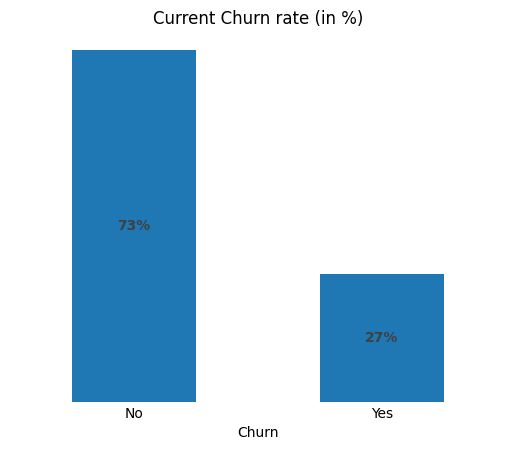

In [14]:
# Plotting to visualize the churn rate proportion
fig,ax = plt.subplots()
Churn.plot(kind='bar',ax=ax,rot=0)
plt.title('Current Churn rate (in %)')
ax.set_yticklabels([])
ax.tick_params(length=0)
ax.set_frame_on(False)
for container in ax.containers:
  labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
  ax.bar_label(container,label_type='center',labels=labels,size=10,color='#414040',fontweight='bold')

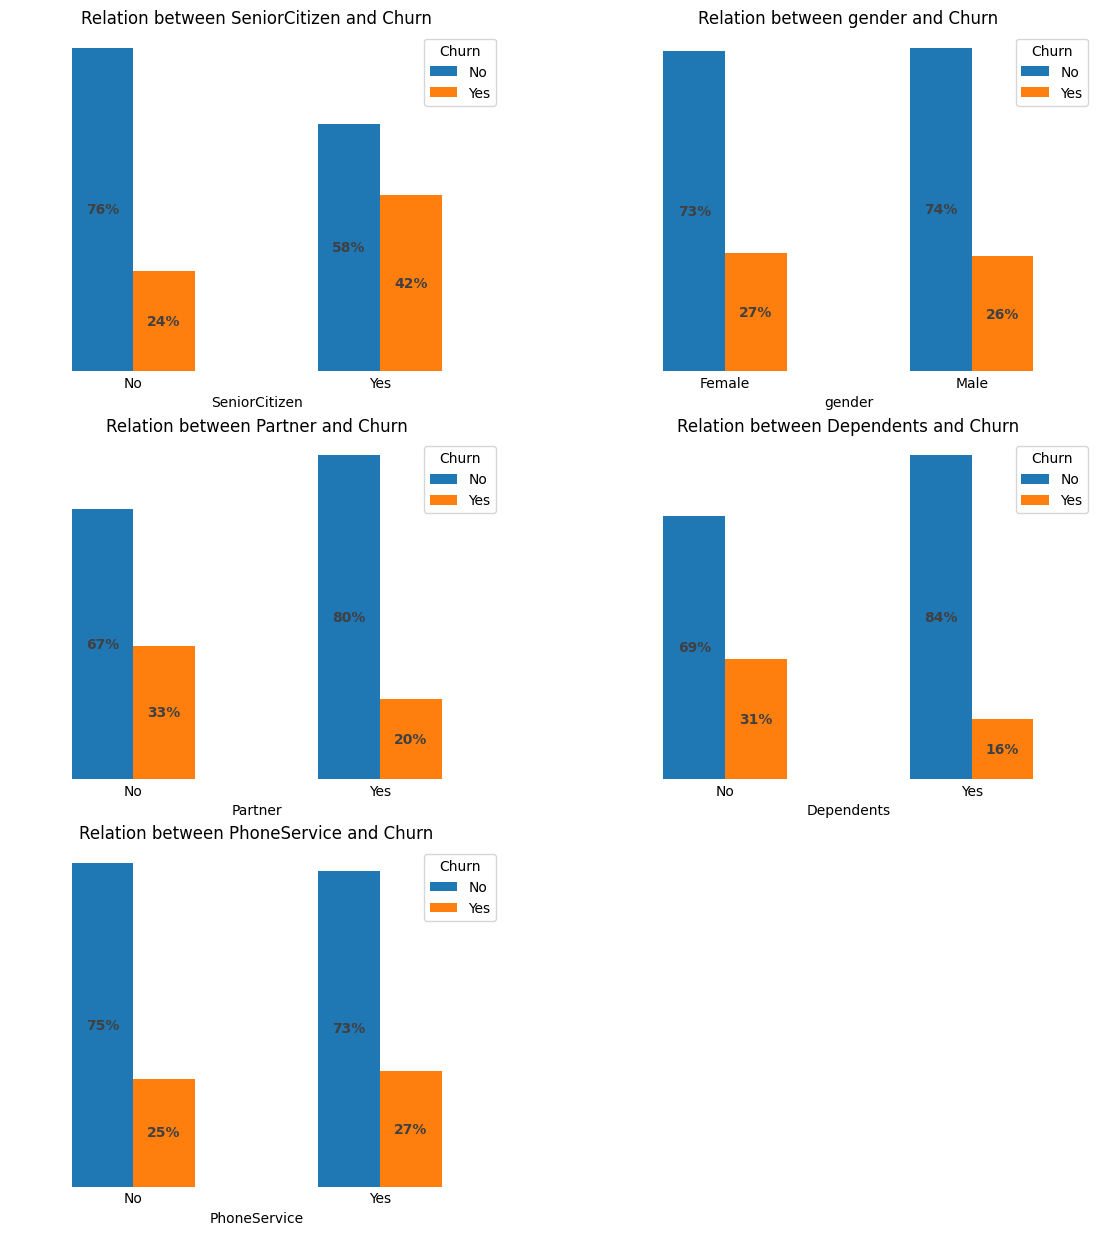

In [15]:
# Ploting some of the categorical data to see the relation between those variables and the Churn rate. We can see that the SeniorCitizen, Partner and Dependents features
# seem to have an influence on the Churn rate.
n = 0
fig = plt.subplots(figsize=(14,15))
ax_total = plt.gca()
ax_total.set_frame_on(False)
ax_total.tick_params(length=0)
ax_total.set_yticklabels([])
ax_total.set_xticklabels([])

for column in ['SeniorCitizen','gender','Partner','Dependents','PhoneService']:
  n = n+1
  df_churn = pd.crosstab(index=df3[column],columns=df3['Churn'],normalize='index')
  ax = plt.subplot(3,2,n)
  df_churn.plot(kind='bar',ax=ax,rot=0)
  ax.set_title(f'Relation between {column} and Churn')
  ax.set_yticklabels([])
  ax.tick_params(length=0)
  ax.set_frame_on(False)

  for container in ax.containers:
   labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
   ax.bar_label(container,label_type='center',labels=labels,size=10,color='#414040',fontweight='bold')

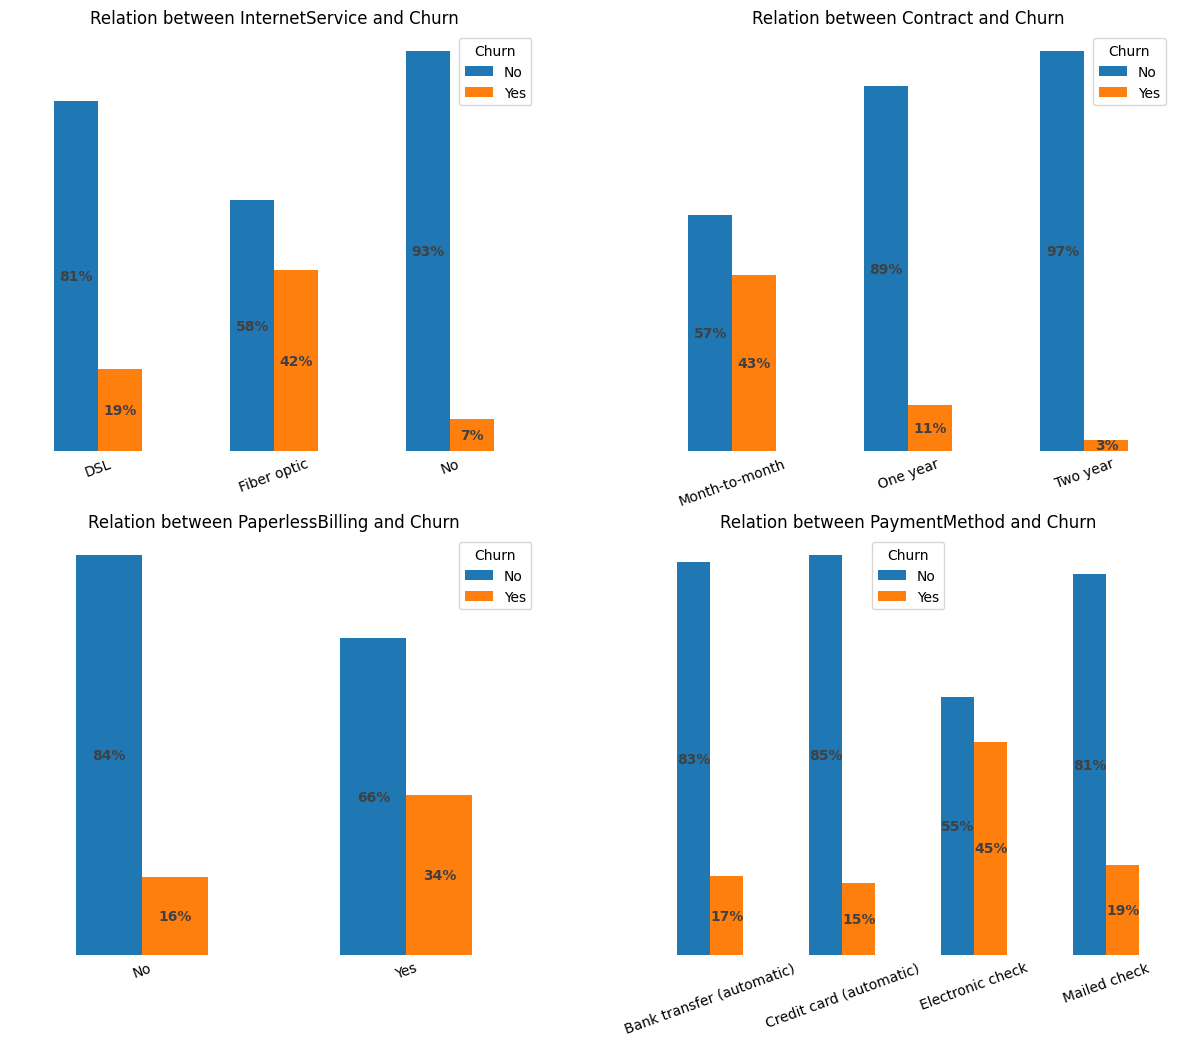

In [16]:
# Likewise, checking the effect on the churn rate of more categorical variables. The InternetService feature have additional services associated with it.
# In this graph, we investigate the internet services alone, and, if any effect is visualized, we further breakdown the relation between those additional
# services and the target variable. The exploration of this data already provides us with possibly useful insights. Among the clients that hire Internet
# services, there is much smaller churn rate in the ones with DSL services when compared to optic fiber. We can also notice a progressively decreasing
# Churn rate with the longer term contracts, and, surprisingly, a higher churn with clients who opt for paperless biling. These observations gives us hints
# on what services we could offer, once the algorithm poits us to the clients more likely to churn, in order to attempt to prevent that client's evasion.
n = 0
fig = plt.subplots(figsize=(15,12))
ax_total = plt.gca()
ax_total.set_frame_on(False)
ax_total.tick_params(length=0)
ax_total.set_yticklabels([])
ax_total.set_xticklabels([])
for column in ['InternetService','Contract','PaperlessBilling','PaymentMethod']:
  n = n+1
  df_churn = pd.crosstab(index=df3[column],columns=df3['Churn'],normalize='index')
  ax = plt.subplot(2,2,n)
  df_churn.plot(kind='bar',ax=ax,rot=20)
  ax.set_title(f'Relation between {column} and Churn')
  ax.set_yticklabels([])
  ax.set_xlabel('')
  ax.tick_params(length=0)
  ax.set_frame_on(False)

  for container in ax.containers:
   labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
   ax.bar_label(container,label_type='center',labels=labels,size=10,color='#414040',fontweight='bold')

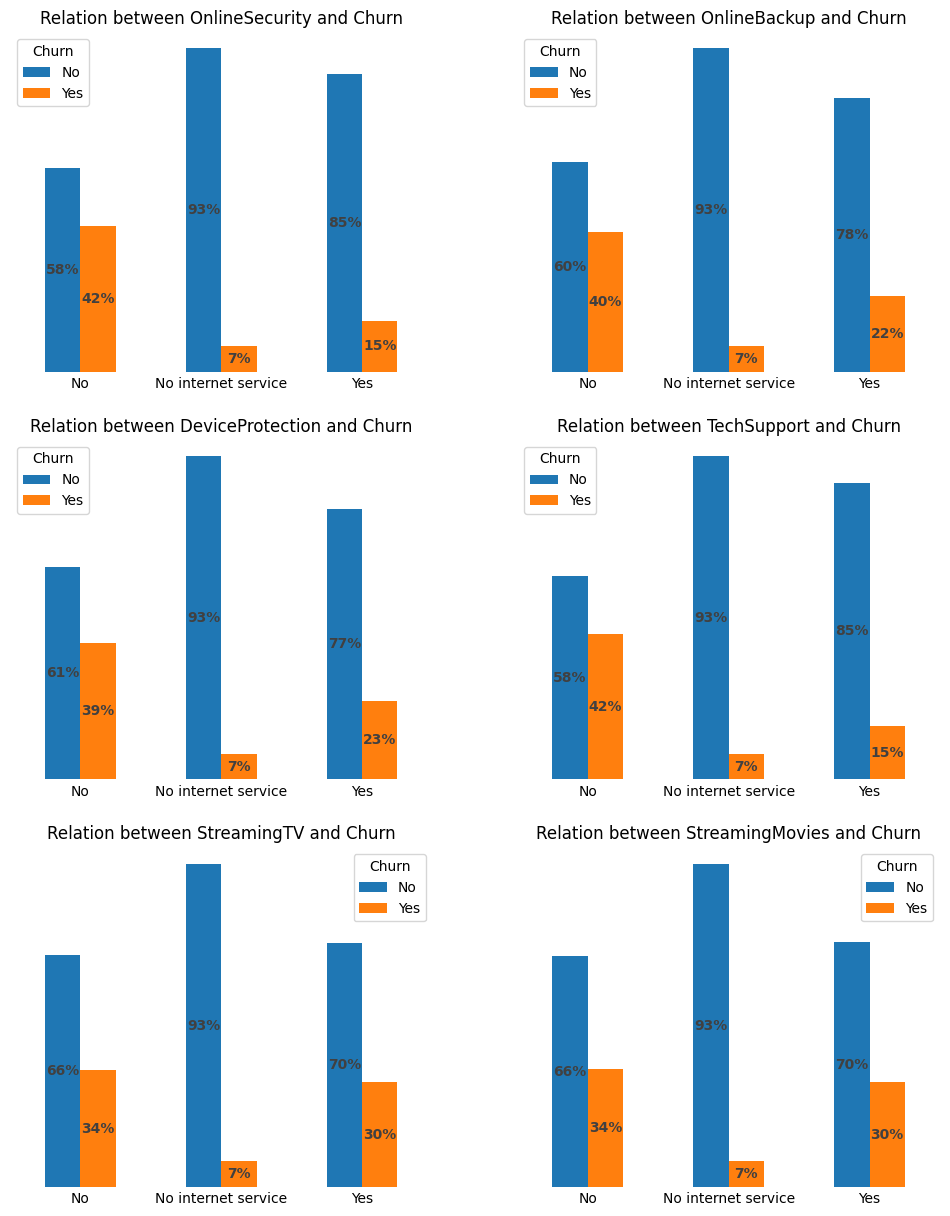

In [17]:
# Now, looking at the additional internet services. All features but streaming tv and streaming movies seemed to have a significant effect on churn. Like in the previous analysis, we can also notice
# potentialy interesting things on these graphs. Apparently, the subscription to online securyty, online backup, device protection andd tech support services increase client fidelity, and  potentialy
# decrease the Churn rate.
n = 0
fig = plt.subplots(figsize=(12,15))
ax_total = plt.gca()
ax_total.set_frame_on(False)
ax_total.tick_params(length=0)
ax_total.set_yticklabels([])
ax_total.set_xticklabels([])
for column in ['OnlineSecurity','OnlineBackup',	'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
  n = n+1
  df_churn = pd.crosstab(index=df3[column],columns=df3['Churn'],normalize='index')
  ax = plt.subplot(3,2,n)
  df_churn.plot(kind='bar',ax=ax,rot=0)
  ax.set_title(f'Relation between {column} and Churn')
  ax.set_yticklabels([])
  ax.set_xlabel('')
  ax.tick_params(length=0)
  ax.set_frame_on(False)

  for container in ax.containers:
   labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
   ax.bar_label(container,label_type='center',labels=labels,size=10,color='#414040',fontweight='bold')

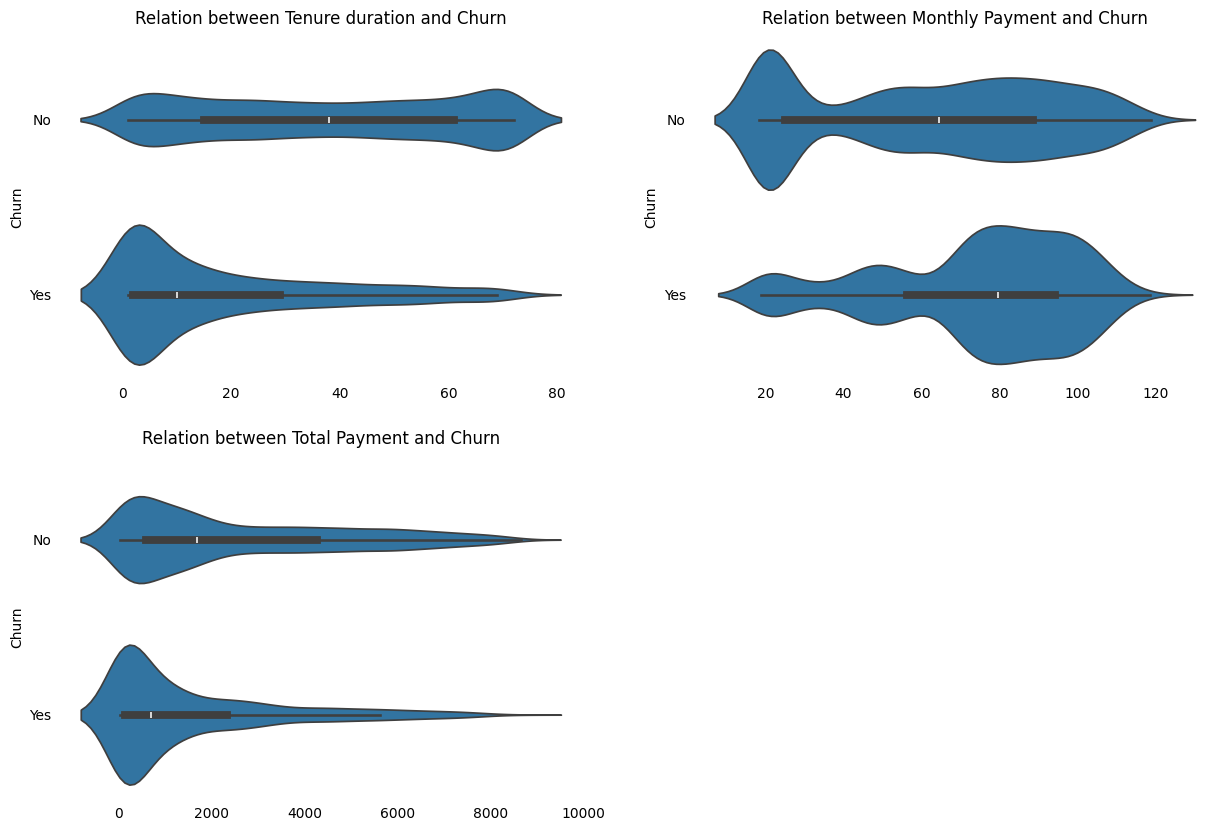

In [18]:
# Time to look at the numerical variables and their relation with the churn rate. As expected, higher fees and shorter tenure durations are potentialy related to
# higher churn rates.
n = 0
fig = plt.subplots(figsize=(15,10))
ax_total = plt.gca()
ax_total.set_frame_on(False)
ax_total.tick_params(length=0)
ax_total.set_yticklabels([])
ax_total.set_xticklabels([])
for num_columns in ['tenure','Monthly','Total']:
  n=n+1
  ax = plt.subplot(2,2,n)
  sns.violinplot(df3,x=num_columns,y='Churn',orient='h')
  x_labels = ['Tenure duration','Monthly Payment','Total Payment']
  ax.set_title(f'Relation between {x_labels[n-1]} and Churn')
  ax.set_xlabel('')
  ax.set_frame_on(False)
  ax.tick_params(length=0)



In [19]:
# Removing the less informative features. Those features might be reconsidered depending on the initial performance of the algorithm.
df_trimmed = df3.drop(['gender','PhoneService','MultipleLines','StreamingTV','StreamingMovies','PaymentMethod'],axis=1)
df_trimmed

,Churn,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,Monthly,Total
customerID,,,,,,,,,,,,,,
0002-ORFBO,No,No,Yes,Yes,9,DSL,No,Yes,No,Yes,One year,Yes,65.60,593.30
0003-MKNFE,No,No,No,No,9,DSL,No,No,No,No,Month-to-month,No,59.90,542.40
0004-TLHLJ,Yes,No,No,No,4,Fiber optic,No,No,Yes,No,Month-to-month,Yes,73.90,280.85
0011-IGKFF,Yes,Yes,Yes,No,13,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,98.00,1237.85
0013-EXCHZ,Yes,Yes,Yes,No,3,Fiber optic,No,No,No,Yes,Month-to-month,Yes,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,No,No,No,13,DSL,Yes,No,No,Yes,One year,No,55.15,742.90
9992-RRAMN,Yes,No,Yes,No,22,Fiber optic,No,No,No,No,Month-to-month,Yes,85.10,1873.70
9992-UJOEL,No,No,No,No,2,DSL,No,Yes,No,No,Month-to-month,Yes,50.30,92.75


In [20]:
# Coding the Churn variable
df_trimmed['Churn'].replace(['Yes','No'],[1,0],inplace=True)

<ipython-input-20-4060ac16a12a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trimmed['Churn'].replace(['Yes','No'],[1,0],inplace=True)
<ipython-input-20-4060ac16a12a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trimmed['Churn'].replace(['Yes','No'],[1,0],inplace=True)


In [21]:
# One hot encoding
data = pd.get_dummies(df_trimmed,dtype='int')
data

,Churn,tenure,Monthly,Total,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,9,65.60,593.30,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
0003-MKNFE,0,9,59.90,542.40,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
0004-TLHLJ,1,4,73.90,280.85,1,0,1,0,1,0,...,0,1,1,0,0,1,0,0,0,1
0011-IGKFF,1,13,98.00,1237.85,0,1,0,1,1,0,...,0,1,1,0,0,1,0,0,0,1
0013-EXCHZ,1,3,83.90,267.40,0,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,13,55.15,742.90,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
9992-RRAMN,1,22,85.10,1873.70,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
9992-UJOEL,0,2,50.30,92.75,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [22]:
# Scaling the numeric columns
for column in ['tenure','Monthly','Total']:
  data[column] = (data[column]-data[column].mean())/data[column].std()
data

,Churn,tenure,Monthly,Total,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,-0.954228,0.026650,-0.745554,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
0003-MKNFE,0,-0.954228,-0.162807,-0.768009,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
0004-TLHLJ,1,-1.157934,0.302526,-0.883393,1,0,1,0,1,0,...,0,1,1,0,0,1,0,0,0,1
0011-IGKFF,1,-0.791264,1.103564,-0.461207,0,1,0,1,1,0,...,0,1,1,0,0,1,0,0,0,1
0013-EXCHZ,1,-1.198675,0.634907,-0.889327,0,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,-0.791264,-0.320688,-0.679557,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
9992-RRAMN,1,-0.424595,0.674793,-0.180698,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
9992-UJOEL,0,-1.239416,-0.481893,-0.966375,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [23]:
# Sampling the training, cross-evaluation and test sets.
training_set = data.sample(frac=0.6,axis=0)
remaining = data.drop(training_set.index)
cv_set = remaining.sample(frac=0.5,axis=0)
test_set = remaining.drop(cv_set.index)

In [24]:
# Getting the features and the target for each of the training, cross-evaluation and test sets.
features_train = training_set.drop('Churn',axis=1)
target_train = training_set['Churn']
features_cv = cv_set.drop('Churn',axis=1)
target_cv = cv_set['Churn']
features_test = test_set.drop('Churn',axis=1)
target_test = test_set['Churn']

In [25]:
# Testing the balance in the target variable for all 3 sets.
print(f'The proportion of positive ocurrences in the training set is {(np.count_nonzero(target_train)/target_train.shape[0])*100:.2f}%')
print(f'The proportion of positive ocurrences in the cross-evaluation set is {(np.count_nonzero(target_cv)/target_cv.shape[0])*100:.2f}%')
print(f'The proportion of positive ocurrences in the test set is {(np.count_nonzero(target_test)/target_test.shape[0])*100:.2f}%')

The proportion of positive ocurrences in the training set is 26.07%
The proportion of positive ocurrences in the cross-evaluation set is 27.74%
The proportion of positive ocurrences in the test set is 26.94%


In [26]:
# Oversampling to fix the imbalance in the training set.
training_set_bal = training_set
for i in range(1,10):
 if np.count_nonzero(training_set_bal['Churn'])/training_set_bal['Churn'].shape[0] < 0.5:
  training_set_bal = pd.concat([training_set_bal,training_set.query('Churn==1')])

training_set_bal = training_set_bal.sample(frac=1)
features_train = training_set_bal.drop('Churn',axis=1)
target_train = training_set_bal['Churn']
print(f'The proportion of positive ocurrences in the training set is {(np.count_nonzero(target_train)/target_train.shape[0])*100:.2f}%')


The proportion of positive ocurrences in the training set is 51.41%


In [27]:
# Converting to numpy array.
x_train = features_train.to_numpy()
y_train = target_train.to_numpy()
x_cv = features_cv.to_numpy()
y_cv = target_cv.to_numpy()
x_test = features_test.to_numpy()
y_test = target_test.to_numpy()

In [28]:
# Importing the libraries.
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [29]:
# Creating and trainning the first model of the neural network. For this project the most important metric is the recall, since false negatives are a lot more concerning when it comes to Churn rate prediction,
# then false positives.

callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.5,patience=5,min_lr=0.0001)

model1 = tf.keras.models.Sequential([

    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Recall()]
               )
history1 = model1.fit(x_train,y_train,epochs=100,callbacks=[callback],validation_data=(x_cv,y_cv))

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.6355 - loss: 0.6196 - recall: 0.5561 - val_binary_accuracy: 0.7397 - val_loss: 0.5211 - val_recall: 0.8205 - learning_rate: 0.0010
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7585 - loss: 0.5056 - recall: 0.8038 - val_binary_accuracy: 0.7546 - val_loss: 0.4907 - val_recall: 0.7872 - learning_rate: 0.0010
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7677 - loss: 0.4981 - recall: 0.8215 - val_binary_accuracy: 0.7461 - val_loss: 0.4987 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7657 - loss: 0.4944 - recall: 0.8107 - val_binary_accuracy: 0.7468 - val_loss: 0.5034 - val_recall: 0.7974 - learning_rate: 0.0010
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7618 - loss: 0.4984 - recall: 0.7967 - val_binary_accuracy: 0.7539 - val_loss: 0.4955 - val_recall: 0.7872

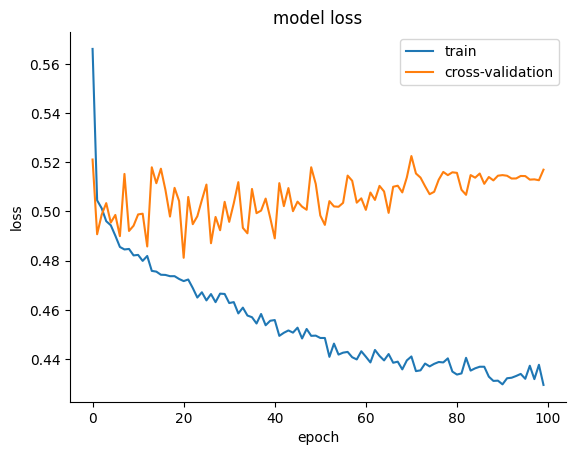

In [30]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross-validation'], loc='upper right')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [31]:
# Evaluating the model 1.
model1.evaluate(x_test,y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - binary_accuracy: 0.7497 - loss: 0.5420 - recall: 0.8141


[0.5619964003562927, 0.7221037745475769, 0.7546173930168152]

In [32]:
# Attempting a different model.
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.5,patience=5,min_lr=0.0001)


model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=8,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(0.001),
               metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Recall()])
history2 = model2.fit(x_train,y_train,epochs=100,callbacks=[callback],validation_data=(x_cv,y_cv))

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.5137 - loss: 0.8195 - recall_1: 0.6167 - val_binary_accuracy: 0.3848 - val_loss: 0.7510 - val_recall_1: 0.9974 - learning_rate: 0.0010
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.5690 - loss: 0.7120 - recall_1: 0.6852 - val_binary_accuracy: 0.5455 - val_loss: 0.6812 - val_recall_1: 0.9692 - learning_rate: 0.0010
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6138 - loss: 0.6540 - recall_1: 0.7571 - val_binary_accuracy: 0.5903 - val_loss: 0.6463 - val_recall_1: 0.9487 - learning_rate: 0.0010
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6260 - loss: 0.6443 - recall_1: 0.7757 - val_binary_accuracy: 0.6216 - val_loss: 0.6166 - val_recall_1: 0.9128 - learning_rate: 0.0010
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6600 - loss: 0.6315 - recall_1: 0.8217 - val_binary_accuracy: 0.6543 - val_loss: 0.5870 - 

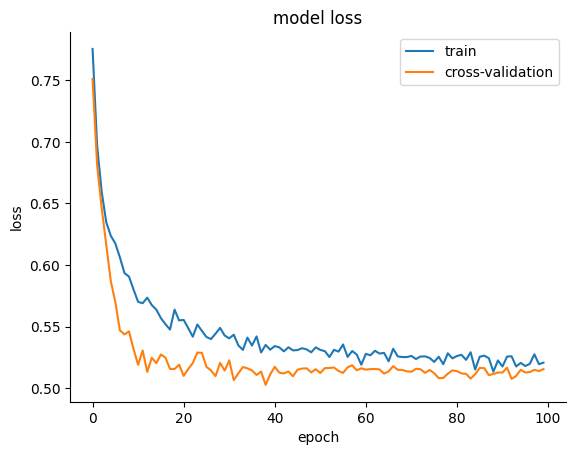

In [33]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross-validation'], loc='upper right')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [34]:
# Evaluating model 2.
model2.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7116 - loss: 0.5270 - recall_1: 0.8722 


[0.539529025554657, 0.6872779130935669, 0.8258575201034546]

In [35]:
# Even though the model has not reached a very high level of acuracy,  it achieved around 90% of recall on the test set. That means the the inaccuracies of the model
#  are mostly due to false positives, which do not represent a risk of income loss to the company as false negatives do. The high recall obtained in the validation and test sets
# indicates this model is very effective at reversing Churn rates since it allows for targeted marketing practices to offer the services and contract models our analysis showed
# to be related to lower client evasion. All that's left now is saving the model for posterior deployment.
model2.save('ModelChurn.keras')